In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Cogsci 131 - Assignment 7
Selena Zhang

## Question 1

In [3]:
import os
import numpy

# Functions that might be useful (please read the documentation)
# x.flatten() (take a N-dimensional numpy array and make it one-dimensional)
# numpy.random.choice -- choose from the list of images
# numpy.dot -- compute the dot product
# numpy.random.normal -- set up random initial weights

DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/"):
    # helper file to help load the images
    # returns a list of numpy vectors
    images = []
    for f in os.listdir(os.path.join(path,str(n))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = numpy.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images

# Load up these image files
A = load_image_files(0)
B = load_image_files(1)

N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

# set up some random initial weights
weights = numpy.random.normal(0,1,size=N)

Text(0, 0.5, 'Probability')

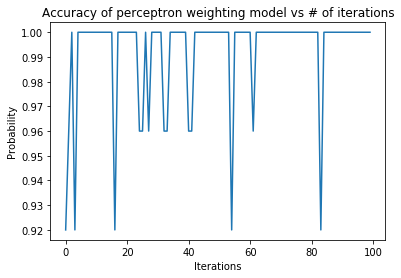

In [4]:
#using section template
# y == output, x = randomly selected, o = output of perceptron
average_accuracy = []
weights = numpy.random.normal(0,1,size=N)
##add 2 matrices together to randomly select
zero_and_one = A + B
j = 0

while j < 100: 
    correct = 0
    selected_array = []
    #select the positions of the files to pick
    actual_digits = []
    ##these will also be the indexes for which one we pick
    selection = np.random.choice(range(len(zero_and_one)), 25)
    ##put them all in 1 array
    for i in selection: 
        selected_array.append(zero_and_one[i])
    ##what is the true value?
    for i in selection:
        if i < len(A):
            actual_digit = 0
            actual_digits.append(actual_digit)
        else:
            actual_digit = 1
            actual_digits.append(actual_digit)
#few iterations and see the trend of accuracy
    for i in range(25): 
        x = selected_array[i]
        y = actual_digits[i]
        #input; xi*wi for all 
        sum_of_inputs_into_weights = np.dot(weights, x)
        if sum_of_inputs_into_weights >= 0:
            o = 1 
        else:
            o = 0
        if o == 1 and y == 0: # where o is the output of the perceptron
            weights -= x
        elif o == 0 and y == 1:
            weights += x
        #both are 0 or 1, it is correct
        else:
            correct += 1 
    accuracy = correct/25
    #for each chunk of 25
    average_accuracy.append(accuracy)
    j += 1
#plot formatting
plt.plot(average_accuracy)
plt.title("Accuracy of perceptron weighting model vs # of iterations")
plt.xlabel("Iterations")
plt.ylabel("Probability")

## Question 2
My code does converge to 100%: we see that there are a few dips below 100%, but the majority of the trials do go to a percentage close to 100%, especially at the end. This means that 0 and 1 can be linearly separable in this particular feature space, and that this is a linear binary classifier.

## Question 3

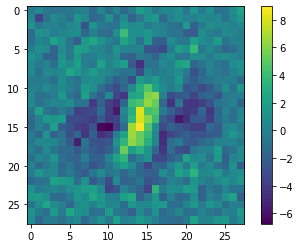

In [237]:
reshape = np.reshape(weights, (28, 28))
plt.imshow(reshape)
plt.colorbar();

This graph shows the weights for each square on the graph. The large negative values (darker blue squares) are the ones that are associated to the 0 digit, and the large positive values (yellow squares) are the ones that are associated with the 1 digit. Alternatively, the squares that correspond to the value 0 mean that the weight isn't associated much with either 0 or 1. We can see that out of all of the weights, the ones in the center are more closely correlated with the 1 digit, and the squares surrounding the yellow line are more negative and thus correspond to the 0 digit. This matrix kind of looks like the digits that we were training on in the beginning: The dark blue is in a circle, which is in the same shape as a 0, and the middle line is a 1, which looks like a 1.

## Question 4
If I set the weight elements of the vector to be actually zero, then I would still expect to see a pretty high level of accuracy. In the graph below we see that this is true; however, at the largest values, we see a dramatic decrease in accuracy. 

Text(0, 0.5, 'Probability')

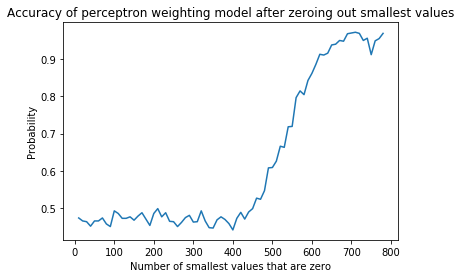

In [6]:
weight_to_zero = range(10, 790, 10)
accuracy_4 = []
for i in weight_to_zero:
    #sets them equal to zero
    weights_4 = np.array(weights)
    new_weights = np.sort(abs(weights))
    for j in range(i):
        new_weights[j] = 0
    correct = 0
    selected_array = []
    #select the positions of the files to pick
    actual_digits = []
    #indexes
    selection = np.random.choice(range(len(zero_and_one)), 1000)
    ##to get all the images into one array
    for k in selection: 
        selected_array.append(zero_and_one[k])
    ## what is the true value?
    for l in selection:
        if l < len(A):
            actual_digit = 0
            actual_digits.append(actual_digit)
        else:
            actual_digit = 1
            actual_digits.append(actual_digit)
#few iterations and see the trend of accuracy
    for m in range(1000): 
        x = selected_array[m]
        y = actual_digits[m]
        #input; xi*wi for all 
        sum_of_inputs_into_weights = np.dot(weights_4, x)
        if sum_of_inputs_into_weights >= 0:
            o = 1 
        else:
            o = 0
        if (o == 1 and y == 1): 
            correct += 1  
        elif (o==0 and y == 0):
            correct += 1
        if o == 1 and y == 0: # where o is the output of the perceptron
            weights -= x
        elif o == 0 and y == 1:
            weights += x
    accuracy = correct/1000
    accuracy_4.append(accuracy)
#plot formatting
plt.plot(weight_to_zero, accuracy_4)
plt.title("Accuracy of perceptron weighting model after zeroing out smallest values")
plt.xlabel("Number of smallest values that are zero")
plt.ylabel("Probability")

Here, we see that the accuracy still hovers around 1 no matter how many values closest to zero that I set to zero. However, we see a dramatic decrease once we zero out the first ~750 weights. That means only a small proportion of weights and squares are the ones critical towards determining whether or not the number is zero or one. 

## Question 5

In [150]:
##setting up each digit to be loaded
C = load_image_files(2)
D = load_image_files(3)
E = load_image_files(4)
F = load_image_files(5)
G = load_image_files(6)
H = load_image_files(7)
I = load_image_files(8)
J = load_image_files(9)

In [230]:
#dictionary mapping letter to digit
d = {0:A,1:B,2:C,3:D,4:E,5:F,6:G,7:H,8:I,9:J}
accuracy_5 = []
#first number in pair
for i in range(10):
    #to collect instances where the numbers are the same
    arr = []
    #second number in pair
    for j in range(10):
        #if the numbers are the same
        if i == j:
            #append 1 because they are obviously the same
            arr.append(1)
        else:
            #if not the same: continue with same algorithm made in the earlier parts
            avg_accuracy = []
            weights = np.random.normal(0,1,size = N)
            #combine the image files into one long array
            combined = d[i] + d[j]
            for k in range(50):
                correct = 0
                selected_array = []
                #select the positions of the files to pick
                actual_digits = []
                #indexes
                selection = np.random.choice(range(len(combined)), 1000)
                ##to get all the images into one array
                for k in selection: 
                    selected_array.append(combined[k])
                ## what is the true value?
                if i < j: 
                    for l in selection:
                        if l < len(d[i]):
                            actual_digit = i
                            actual_digits.append(actual_digit)
                        else:
                            actual_digit = j
                            actual_digits.append(actual_digit)
                #if it is flipped
                elif i > j:
                    for l in selection:
                        if l < len(d[i]):
                            actual_digit = j
                            actual_digits.append(actual_digit)
                        else:
                            actual_digit = i
                            actual_digits.append(actual_digit)
                #retraining; same as before, on 1000
                for m in range(1000): 
                    x = selected_array[m]
                    y = actual_digits[m]
                    sum_of_inputs_into_weights = np.dot(weights, x)
                    #input; xi*wi for all 
                    if sum_of_inputs_into_weights >= 0:
                        o = 1 
                    else:
                        o = 0
                    if o == 1 and y == 0: # where o is the output of the perceptron
                        weights -= x
                    elif o == 0 and y == 1:
                        weights += x
                    #both are 0 or 1, it is correct
                    else:
                        correct += 1 
                accuracy = correct/1000
                #for each chunk
                avg_accuracy.append(accuracy)
        #if they're the same, just append a 1.
        arr.append(avg_accuracy[0])
    accuracy_5.append(arr)

In [227]:
plot_5 = np.reshape(accuracy_5, (10, 10))

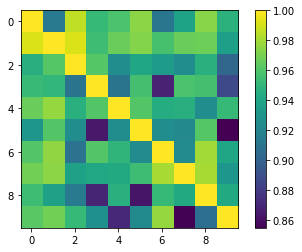

In [229]:
plt.imshow(plot_5)
plt.colorbar();

This plot does match my intuitions as to which pairs are easiest and the hardest. Besides comparing a number to itself, we see that the easiest to distinguish are numbers that have different shapes, such as 6 and 10, or 5 and 1. These pairings have much higher rates of accuracy. Conversely, the squares with the lowest accuracy, such as 4 and 9 & 8 and 3, are much harder to recognize because they share a lot of the same features and look somewhat alike. 